In [1]:
#include all the modules here
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.cluster import KMeans
import seaborn as sns

## (1) Prostate_cancer-test.csv” is the test dataset. Using K-NN technique to determine the diagnosis result (that is, M or B), for K = 5, 7, 9. Note that you can use scikit-learn or write your own program

In [2]:
# Create a Pandas DataFrame to store the data
df=pd.read_csv('Prostate_cancer-training.csv')

# Drop index column
df = df.drop(df.columns[[0]], axis=1)
print('\nTraining Dataset is prepared for K-NN technique\n----------\n',df.head())


Training Dataset is prepared for K-NN technique
----------
   diagnosis_result  radius  texture  perimeter  area  smoothness  compactness  \
0                M      23       12        151   954       0.143        0.278   
1                B       9       13        133  1326       0.143        0.079   
2                M      21       27        130  1203       0.125        0.160   
3                M      14       16         78   386       0.070        0.284   
4                M       9       19        135  1297       0.141        0.133   

   symmetry  fractal_dimension  
0     0.242              0.079  
1     0.181              0.057  
2     0.207              0.060  
3     0.260              0.097  
4     0.181              0.059  


In [3]:
# Drop the target column for X
X = df.drop(df.columns[[0]], axis=1)
print('Training Dataset without diagnosis_result column :\n', X)
# Get the target column for y label
y = df['diagnosis_result'].values
# Convert 'B' and 'M' to integer for calculation
y = np.where(y == 'B', 0, 1)
print('Data list of diagnosis_result column in training dataset: \n', y)

Training Dataset without diagnosis_result column :
     radius  texture  perimeter  area  smoothness  compactness  symmetry  \
0       23       12        151   954       0.143        0.278     0.242   
1        9       13        133  1326       0.143        0.079     0.181   
2       21       27        130  1203       0.125        0.160     0.207   
3       14       16         78   386       0.070        0.284     0.260   
4        9       19        135  1297       0.141        0.133     0.181   
..     ...      ...        ...   ...         ...          ...       ...   
70      21       18        124  1130       0.090        0.103     0.158   
71       9       26         59   244       0.098        0.153     0.190   
72      21       12        114   929       0.107        0.183     0.193   
73      22       25         90   584       0.101        0.128     0.166   
74      18       13         79   471       0.092        0.068     0.172   

    fractal_dimension  
0               0.079  

In [4]:
#Preprocessing Prostate_cancer-training dataset for each feature to have zero-mean, unit standard-deviation
myscaler = StandardScaler()
myscaler.fit(X)
X = myscaler.transform(X)

In [5]:
# Create test dataset and preprocess this
df=pd.read_csv('Prostate_cancer-test.csv')
# drop index column
test_X_df = df.drop(df.columns[[0]], axis=1)
print('\nProstate_cancer-test dataset for test\n----------\n',test_X_df.head())



Prostate_cancer-test dataset for test
----------
    radius  texture  perimeter  area  smoothness  compactness  symmetry  \
0      21       18        104   818       0.092        0.084     0.180   
1      10       17         88   559       0.129        0.105     0.240   
2      11       21        120  1006       0.107        0.215     0.215   
3      16       18        144  1245       0.129        0.345     0.291   
4      22       16         83   506       0.099        0.095     0.172   

   fractal_dimension  
0              0.054  
1              0.066  
2              0.067  
3              0.081  
4              0.060  


In [6]:
# Preprocessing Prostate_cancer-test dataset for each feature to have zero-mean, unit standard-deviation
myscaler.fit(test_X_df)
test_X = myscaler.transform(test_X_df)
print('Normalized test dataset \n',test_X)

Normalized test dataset 
 [[ 0.86508029 -0.13101755  0.16455984  0.196624   -0.73282022 -0.5934758
  -0.33963456 -1.45030332]
 [-1.33767046 -0.32369041 -0.4745075  -0.52922572  2.20163306 -0.27715621
   1.57559792  0.44139666]
 [-1.13742039  0.44700104  0.80362717  0.72349562  0.456823    1.37975593
   0.77758439  0.59903833]
 [-0.13617005 -0.13101755  1.76222818  1.39329517  2.20163306  3.33792483
   3.20354552  2.80602164]
 [ 1.06533036 -0.51636327 -0.67421604 -0.67775868 -0.17765339 -0.42778459
  -0.59499889 -0.50445333]
 [-1.33767046 -0.13101755 -1.03369142 -0.96921957  0.69475164 -0.44284743
  -0.21195239  1.07196332]
 [ 0.06408002  0.44700104 -0.55439091 -0.63852356  0.53613255  0.46092283
   0.10725302  0.91432166]
 [-1.33767046 -0.70903613  2.88059601  3.16728311  0.37751345  2.16302349
  -0.24387294  0.75667999]
 [ 0.66483023 -0.901709    1.16310255  1.0766117   1.64646622  0.83749377
  -0.88228376  1.38724665]
 [ 1.66608057  0.44700104 -0.91386629 -0.85431672 -0.33627248 -0.7

In [7]:
# According to Prostate_cancer-training.csv dataset, doing KNeighborsClassifier 
# Then according to Prostate_cancer-test.csv, predicting the diagnosis result (that is, M or B), for K = 5, 7, 9
# Print test dateset and predicted result as list for each K seperatly
def determine_KNN(X_value, y_value, k):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_value, y_value)

    y_predict = clf.predict(test_X)
    
    print('Prediction Results for k = ', k,'\n')
    y_predict_df = pd.DataFrame(data = np.where(y_predict == 0, 'B', 'M'),
             columns = ['result'])
    predict_df = pd.concat([test_X_df,y_predict_df], axis=1)
    print(predict_df.head(30).to_string())

# Createing list for k = 5, 7, 9 and calling determine_KNN methods
k_list = [5,7,9]
for k in k_list:
    determine_KNN(X, y, k)

Prediction Results for k =  5 

    radius  texture  perimeter  area  smoothness  compactness  symmetry  fractal_dimension result
0       21       18        104   818       0.092        0.084     0.180              0.054      M
1       10       17         88   559       0.129        0.105     0.240              0.066      M
2       11       21        120  1006       0.107        0.215     0.215              0.067      M
3       16       18        144  1245       0.129        0.345     0.291              0.081      M
4       22       16         83   506       0.099        0.095     0.172              0.060      B
5       10       18         74   402       0.110        0.094     0.184              0.070      B
6       17       21         86   520       0.108        0.154     0.194              0.069      M
7       10       15        172  1878       0.106        0.267     0.183              0.068      M
8       20       14        129  1132       0.122        0.179     0.163              0

In [ ]:
# Predict for test dataset from selected two features like perimeter and compactness
# Determine the diagnosis result (that is, M or B), for K = 5, 7, 9
df=pd.read_csv('Prostate_cancer-training.csv')
# Drop index column
df = df.drop(df.columns[[0]], axis=1)
print('\Prostate_cancer-training Dataset is prepared for K-NN technique\n----------\n',df.head())  

# Drop the target column
X = df.drop(df.columns[[0,1,2,4,5,7,8]], axis=1)
y = df['diagnosis_result'].values # Get the target column for y label
y = np.where(y == 'B', 0, 1) # Convert 'B' and 'M' to integer for calculation

# Data Preprocessing for each feature to have zero-mean, unit standard-deviation
myscaler = StandardScaler()
myscaler.fit(X)
X = myscaler.transform(X)

# Create test dataset and preprocess this
df=pd.read_csv('Prostate_cancer-test.csv')
# create X for test
test_X = df.drop(df.columns[[0,1,2,4,5,7,8]], axis=1)
print('\nProstate_cancer-test dataset for test for 2 features\n----------\n',test_X.head())

myscaler.fit(test_X)
test_X = myscaler.transform(test_X)

# Create KNeighborsClassifier for selected two features perimeter and compactness
# Determine the diagnosis result (that is, M or B)
def determine_KNN_for_2features(X_value, y_value, k):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_value, y_value)
    y_predict = clf.predict(test_X)
    
    # Plotting decision regions
    ax = plot_decision_regions(test_X, y_predict, clf=clf, legend=2)
    plt.xlabel('perimeter')
    plt.ylabel('compactness')
    plt.title('K-NN with K = ' + str(k))
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['B', 'M'], framealpha=0.3, scatterpoints=1)
    plt.show()

k_list = [5,7,9]
for k in k_list:
    determine_KNN_for_2features(X, y, k)

## (2) Use the first and second PC (principal component) to conduct k-means cluster for “Prostate_cancer-training.csv” dataset. What is the value of k that you think is proper? Visualize the clustering results.

In [8]:
# Create a Pandas DataFrame to store the data
cancer_df=pd.read_csv('Prostate_cancer-training.csv')

# Drop index column and diagnosis_result
cancer_df = cancer_df.drop(cancer_df.columns[[0,1]], axis=1)
print('\nDataset is prepared for K-NN technique\n----------\n',cancer_df.head())


Dataset is prepared for K-NN technique
----------
    radius  texture  perimeter  area  smoothness  compactness  symmetry  \
0      23       12        151   954       0.143        0.278     0.242   
1       9       13        133  1326       0.143        0.079     0.181   
2      21       27        130  1203       0.125        0.160     0.207   
3      14       16         78   386       0.070        0.284     0.260   
4       9       19        135  1297       0.141        0.133     0.181   

   fractal_dimension  
0              0.079  
1              0.057  
2              0.060  
3              0.097  
4              0.059  


In [9]:
# Determine the first and second PC (principal component) to conduct k-means cluster
xNorm = StandardScaler().fit_transform(cancer_df)
print('\nDataset normalization (first data)\n----------\n', xNorm[0])
pca = PCA(n_components=2)
pcaComponents = pca.fit_transform(xNorm)
pcaResult = pd.DataFrame(data = pcaComponents,
             columns = ['1st_Principal_Component', '2nd_Principal_Component'])
print('\nPCA dataframe\n----------\n',pcaResult)


Dataset normalization (first data)
----------
 [ 1.26785085 -1.18048387  2.40750697  0.87931534  2.62828462  2.55315195
  1.58121458  1.61343317]

PCA dataframe
----------
     1st_Principal_Component  2nd_Principal_Component
0                  4.398899                 0.181766
1                  1.543798                -3.098116
2                  1.931229                -1.303320
3                  2.150347                 3.599619
4                  2.169595                -2.680056
..                      ...                      ...
70                -0.711462                -2.301330
71                 0.317489                 2.992222
72                 0.855243                -0.704704
73                -0.703089                 0.508445
74                -1.994875                -0.095146

[75 rows x 2 columns]


C:\Users\seniz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


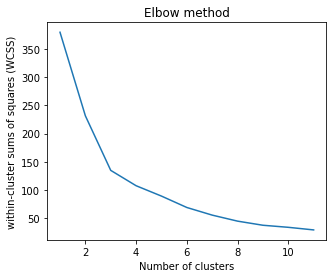

In [10]:
# From this graph, the proper number of clusters can be found as 3
wcss =[]
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i).fit(pcaResult)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(5,4))    
plt.plot(range(1, 12), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.show()

In [ ]:
#Visualize the clustering results for first and second PCA
cluster_num = 3  # according to result of elbow method  
    
kmeans = KMeans(n_clusters=cluster_num)
y_kmeans = kmeans.fit_predict(pcaResult)
print('\n k-means result (first 5)\n----------\n',y_kmeans[0:5])
print('\nCluster Center \n----------\n',kmeans.cluster_centers_)

centroids = kmeans.cluster_centers_

plt.scatter(x=pcaResult['1st_Principal_Component'], y=pcaResult['2nd_Principal_Component'], c=y_kmeans, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='black', zorder=10,lw=3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data (PCA visualization)',fontweight='bold')
plt.show()